In [2]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from image_autoencoder import ImageAutoencoder
import util

In [3]:
mnist = torchvision.datasets.MNIST("data", download=False, transform=torchvision.transforms.ToTensor())
data_loader = torch.utils.data.DataLoader(mnist, batch_size=100, shuffle=True)

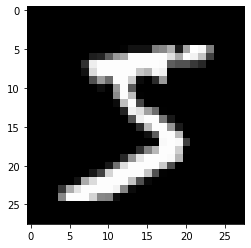

In [4]:
t, label = mnist[0]
plt.imshow(t.numpy()[0], cmap="gray")

In [5]:
def train_autoencoder(model, lr, epochs, filter_func, *filter_func_param):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_function = nn.MSELoss()
    for i_epoch in range(epochs):
        epoch_loss = 0
        for i_batch, (value_batched, label_batched) in enumerate(data_loader):
            if filter_func is None:
                output = model(value_batched)
            else:
                output = model(filter_func(value_batched, *filter_func_param))
            loss = loss_function(output, value_batched)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {i_epoch}:\t{epoch_loss}")

In [6]:
autoencoder_params = [1, 28, 28, [4, 4, 8, 8], [3, 2, 3, 2], [1, 2, 1, 2], [1, 0, 0, 0], [128, 64]]

models = [ImageAutoencoder(*autoencoder_params),
          ImageAutoencoder(*autoencoder_params),
          ImageAutoencoder(*autoencoder_params)]
print(models[0])
print(models[0].output_size)

ImageAutoencoder(
  (image_encoder): ImageEncoder(
    (cnn_layers): Sequential(
      (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(4, 4, kernel_size=(2, 2), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Conv2d(8, 8, kernel_size=(2, 2), stride=(2, 2))
      (7): ReLU()
    )
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (dense_layers): Sequential(
      (0): Linear(in_features=288, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=64, bias=True)
    )
  )
  (image_decoder): ImageDecoder(
    (dense_layers): Sequential(
      (0): Linear(in_features=64, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=288, bias=True)
      (3): ReLU()
    )
    (unflatten): Unflatten(dim=1, unflattened_size=(8, 6, 6))
    (cnn_layers): Sequential(
      (0): ConvTranspose2d(8

In [7]:
lr = 0.001
epochs = 10
train_autoencoder(models[0], lr, epochs, None)
train_autoencoder(models[1], lr, epochs, util.gauss_filter, 0, 0.2)
train_autoencoder(models[2], lr, epochs, util.change_n_pixel_filter, 150)

Epoch 0:	45.63076480478048
Epoch 1:	29.069851253181696
Epoch 2:	19.764113418757915
Epoch 3:	15.803318271413445
Epoch 4:	13.443295048549771
Epoch 5:	11.862741991877556
Epoch 6:	10.641621747985482
Epoch 7:	9.799567229114473
Epoch 8:	9.128226646222174
Epoch 9:	8.571343414485455
Epoch 0:	45.919490210711956
Epoch 1:	28.90676697343588
Epoch 2:	17.65315821953118
Epoch 3:	13.779724197462201
Epoch 4:	11.660376280546188
Epoch 5:	10.369598171673715
Epoch 6:	9.544155091047287
Epoch 7:	8.875926047563553
Epoch 8:	8.371458981186152
Epoch 9:	7.9862430188804865
Epoch 0:	48.353363648056984
Epoch 1:	35.0652716383338
Epoch 2:	26.521102249622345
Epoch 3:	20.579465810209513
Epoch 4:	18.067590717226267
Epoch 5:	16.39198195002973
Epoch 6:	15.132510539144278
Epoch 7:	14.204409459605813
Epoch 8:	13.546910181641579
Epoch 9:	13.051776390522718


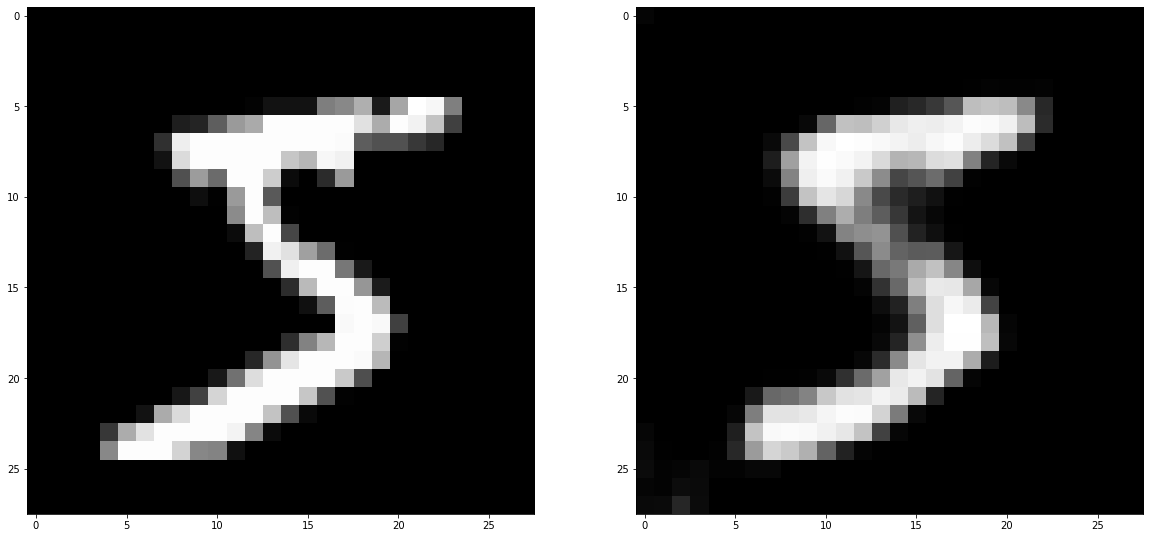

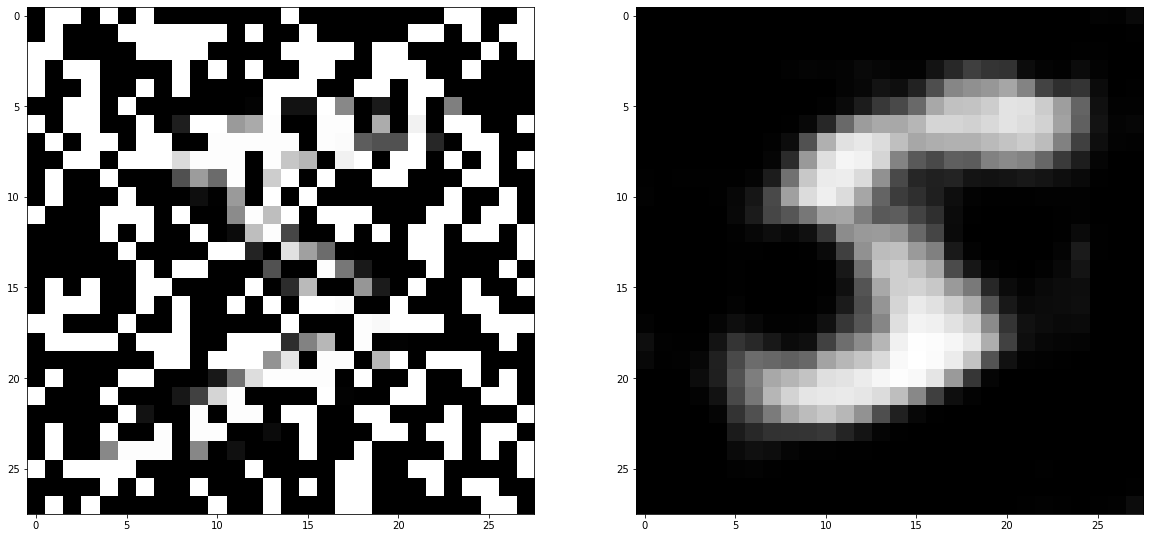

In [29]:
idx = 0
t, _ = mnist[idx]
a = util.plot(models[0], t)
#b = util.plot(models[1], util.gauss_filter(t, 0, 0.2))
c = util.plot(models[2], util.change_n_pixel_filter(t, 300))